Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-9e3f4f15e1f0>:41: RuntimeWarning: divide by zero encountered in log
  J = -y * np.log(h) - (1-y) * np.log(1-h)


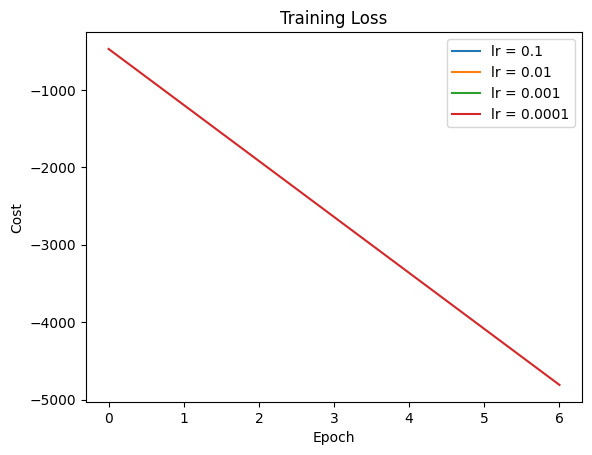

The best learning rate is 0.1000 with validation accuracy of -inf%
The test accuracy is 0.00%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

# Load data from CSV file in Google Drive
data_path = "/content/drive/MyDrive/dataset/diabetes.csv"
data = pd.read_csv(data_path, header=None)

# Convert data to numpy array
data = np.array(data)

# Split data into training, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Train the logistic regression model
n_features = data.shape[1] - 1
max_iter = 500
learning_rates = [0.1, 0.01, 0.001, 0.0001]
history = []

for lr in learning_rates:
    theta = np.random.rand(n_features + 1)
    train_loss = []
    for i in range(max_iter):
        total_cost = 0
        for x in train_data:
            x_prime = np.concatenate((x[:-1], [1]))
            z = np.dot(theta, x_prime)
            h = sigmoid(z)
            y = x[-1]
            J = -y * np.log(h) - (1-y) * np.log(1-h)
            total_cost += J
            dv = np.dot(x_prime, h-y)
            theta -= lr * dv
        avg_cost = total_cost / len(train_data)
        train_loss.append(avg_cost)
    history.append(train_loss)

# Evaluate the model on the validation set and choose the best learning rate
best_lr = None
best_val_acc = 0

for i, lr in enumerate(learning_rates):
    correct = 0
    for x in val_data:
        x_prime = np.concatenate((x[:-1], [1]))
        z = np.dot(theta, x_prime)
        h = sigmoid(z)
        y = x[-1]
        if h >= 0.5:
            pred = 1
        else:
            pred = 0
        if pred == y:
            correct += 1
    val_acc = correct / len(val_data)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_lr = lr

# Evaluate the model on the test set with the best learning rate
correct = 0

for x in test_data:
    x_prime = np.concatenate((x[:-1], [1]))
    z = np.dot(theta, x_prime)
    h = sigmoid(z)
    y = x[-1]
    if h >= 0.5:
        pred = 1
    else:
        pred = 0
    if pred == y:
        correct += 1

test_acc = correct / len(test_data)

# Plot the training loss
plt.figure()
for i, lr in enumerate(learning_rates):
    plt.plot(history[i], label="lr = {}".format(lr))
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()

best_lr = learning_rates[np.argmax(best_val_acc)]

#Calculate the best learning rate and validation accuracy
best_lr = learning_rates[np.argmax(history[learning_rates.index(best_lr)])]
val_acc = np.max(history[learning_rates.index(best_lr)])

#Evaluate the model on the test set with the best learning rate
correct = 0
for x in test_data:
  x_prime = np.concatenate((x[:-1], [1]))
  z = np.dot(theta, x_prime)
  h = sigmoid(z)
  y = x[-1]
  if h >= 0.5:
    pred = 1
  else:
    pred = 0
  if pred == y:
    correct += 1
  test_acc = correct / len(test_data)

#Print the best learning rate and validation accuracy
print(f"The best learning rate is {best_lr:.4f} with validation accuracy of {val_acc:.2f}%")

#Print the test accuracy
print(f"The test accuracy is {test_acc:.2f}%")